# Modelo de Regresión Polinómica

Elaborado por: **Gabriel Armando Landín Alvarado** 

## ¿Qué es un modelo de regresión polinómica?

Un modelo de **regresión polinómica** es una técnica de análisis de regresión en la que la relación entre la variable independiente \(X\) y la variable dependiente \(Y\) se modela mediante un polinomio de \(n\)-ésimo grado. A diferencia de la regresión lineal simple, que ajusta una línea recta a los datos, la regresión polinómica puede ajustar una curva, lo que permite capturar relaciones más complejas entre las variables.

La ecuación general de un modelo de regresión polinómica de grado \(n\) es:

$$
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \ldots + \beta_n X^n + \epsilon
$$

Donde:

* $Y$ es la variable dependiente.

* $X$ es la variable independiente.

* $\beta_0, \beta_1, ..., \beta_n$  son los coeficientes del modelo.

* $\varepsilon$ es el término de error.

Este tipo de regresión es útil cuando la relación entre las variables no es lineal y se necesita una curva para describir mejor los datos.

1. [Regresión polinomial - Wikipedia, la enciclopedia libre.](https://es.wikipedia.org/wiki/Regresi%C3%B3n_polinomial.)
2. [Regresión polinomial - Wikiwand.](https://www.wikiwand.com/es/Regresi%C3%B3n_polinomial.)
3. [Regresión polinomial - Probabilidad y Estadística.](https://bing.com/search?q=%c2%bfQu%c3%a9+es+un+modelo+de+regresi%c3%b3n+polinomico%3f.)
4. [Introducción a la regresión polinomial | Statologos® 2024.](https://statologos.com/regresion-polinomica/.)
5. [Modelo de regresión - Qué es, definición y concepto - Economipedia.](https://economipedia.com/definiciones/modelo-de-regresion.html.)

## Carga y exploración de los datos

Lo primero será cargar las bibliotecas necesarias para el proceso de cargar los datos y realizar un breve analisis exploratorio, dado que este ejercicio es la continuación de otro previo correspondiente al modelo de regresión líneal, si desea conocerlo de click [aquí](https://github.com/LandinGabriel13/Modelo_de_regresion_lineal). 

In [20]:
# importar las bilbliotecas y asignar un alias 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
# Cargar del archivo csv con la función read_csv() de pandas
data = pd.read_csv('../Data/fuel_consumption_ratings_2023.csv')
# imprimimos la información general de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Model_year                     840 non-null    int64  
 1   Make                           840 non-null    object 
 2   Model                          840 non-null    object 
 3   Vehicle_class                  840 non-null    object 
 4   Engine_size                    840 non-null    float64
 5   Cylinders                      840 non-null    int64  
 6   Transmission                   840 non-null    object 
 7   Fuel_type                      840 non-null    object 
 8   Consumption_city(L/100km)      840 non-null    float64
 9   Consumption_highway(L/100km)   840 non-null    float64
 10  Consumption_combined(L/100km)  840 non-null    float64
 11  Consumption_combined(mpg)      840 non-null    int64  
 12  CO2_emissions(g/km)            840 non-null    int

Podemos observar que se tienen 840 resgistros, 15 columnas con diferentes tipos de dato, asimismo, vemos que no existen datos nulos, la descripción general de las columnas es la siguiente: 

* **Model_year:** Año de modelo, en este caso modelos 2023
* **Make:** Fabricante del vehículo
* **Model:** Modelo de vehículo
* **Vehicle_class:** Tipo o clase del vehículo
* **Engine_size:** Tamaño de motor
* **Cylinders:** Número de cilindros
* **Transmission:** Tipo de transmisión
* **Fuel_type:** Tipo de combustible
* **Consumption_city(L/100km):** Consumo en litros por cada 100 km en ciudad
* **Consumption_highway(L/100km):** Consumo en litros por cada 100 km en carretera
* **Consumption_combined(L/100km):** Consumo en litros por cada 100 km combinado
* **Consumption_combined(mpg):** Consumo combinado en millas por galón
* **CO2_emissions(g/km):** Emisiones de dióxido de carbono gramos sobre km
* **CO2_rating:** Clasificación con base en las emisiones de CO2
* **Smog_rating:** Clasificación de acuerdo al smog o niebla tóxica

In [3]:
# imprimir los primeros 5 registros o filas del dataframe
data.head()

,Model_year,Make,Model,Vehicle_class,Engine_size,Cylinders,Transmission,Fuel_type,Consumption_city(L/100km),Consumption_highway(L/100km),Consumption_combined(L/100km),Consumption_combined(mpg),CO2_emissions(g/km),CO2_rating,Smog_rating
0,2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6,7
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
3,2023,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2023,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


In [4]:
# Observamos la forma del dataframe, es decir, número de filas y columnas 
data.shape

(840, 15)

In [5]:
# Realizamos una exploración de estadística descriptiva de los datos
data.describe()

,Model_year,Engine_size,Cylinders,Consumption_city(L/100km),Consumption_highway(L/100km),Consumption_combined(L/100km),Consumption_combined(mpg),CO2_emissions(g/km),CO2_rating,Smog_rating
count,840.0,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,2023.0,3.156429,5.638095,12.472738,9.374762,11.079167,27.320238,258.048810,4.511905,5.227381
std,0.0,1.357584,1.968156,3.521936,2.321770,2.922871,7.574883,64.662256,1.286160,1.675587
min,2023.0,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2023.0,2.000000,4.000000,10.100000,7.700000,9.000000,22.000000,211.000000,4.000000,5.000000
50%,2023.0,3.000000,6.000000,12.100000,9.100000,10.750000,26.000000,255.000000,5.000000,5.000000
75%,2023.0,3.600000,6.000000,14.700000,10.800000,12.900000,31.000000,299.000000,5.000000,7.000000
max,2023.0,8.000000,16.000000,30.700000,20.900000,26.100000,64.000000,608.000000,9.000000,8.000000


 Gráficamos mediante un diagrama de caja y bigote algunas variables interesantes para ser consideradas como variables independientes en nuestro modelo.

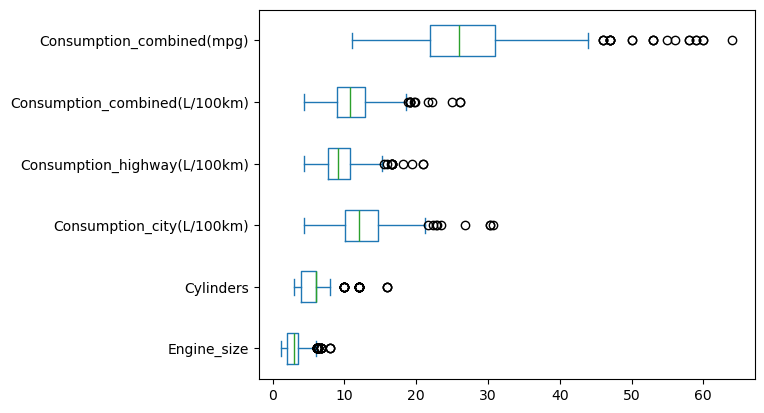

In [6]:
data[['Engine_size', 'Cylinders', 'Consumption_city(L/100km)', 'Consumption_highway(L/100km)',  'Consumption_combined(L/100km)', 'Consumption_combined(mpg)']].plot.box(vert=False)
plt.show()

De acuerdo con lo observado en el gráfico anterior, se seleccionan solo algunas de las características o columnas de interés, en este caso: Engine_size, Cylinders, Consumption_city(L/100km), 'Consumption_highway(L/100km' y Consumption_combined(L/100km) como variables independientes, asimismo, la variable dependiente CO2_emissions(g/km).

In [21]:
data_1 = data[['Engine_size', 'Cylinders', 'Consumption_city(L/100km)', 'Consumption_highway(L/100km)', 'Consumption_combined(L/100km)', 'CO2_emissions(g/km)']]
data_1.head(3)

,Engine_size,Cylinders,Consumption_city(L/100km),Consumption_highway(L/100km),Consumption_combined(L/100km),CO2_emissions(g/km)
0,1.5,4,7.9,6.3,7.2,167
1,1.5,4,8.1,6.5,7.4,172
2,1.5,4,8.9,6.5,7.8,181


Veamos la distribución de los datos filtrados anteriormente mediante histogramas.

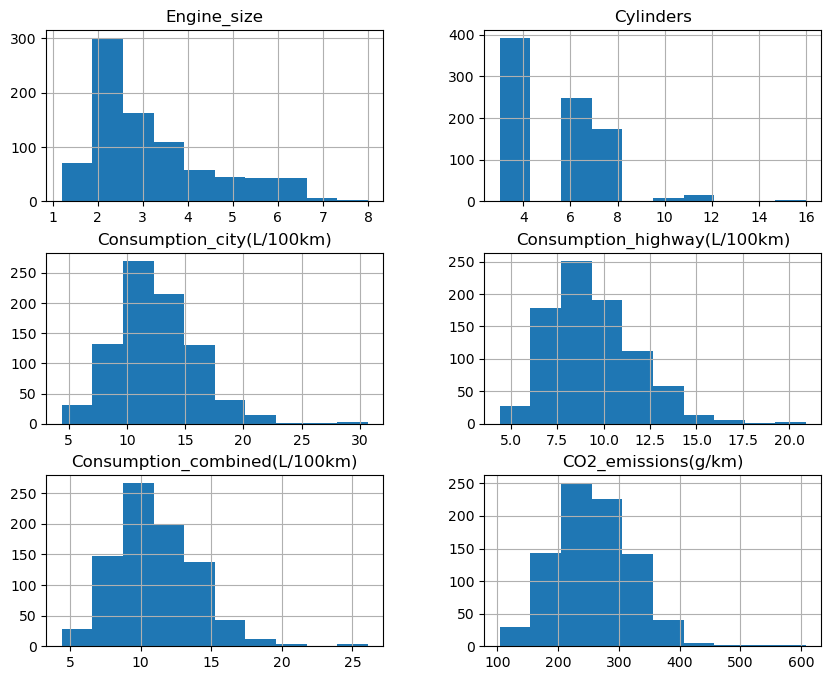

In [8]:
data_1.hist(figsize=(10, 8))
plt.show()

A continuación, se crean gráficos de dispersión de las variables independientes vs la variable dependiente, para esto empleamos el siguiente código:

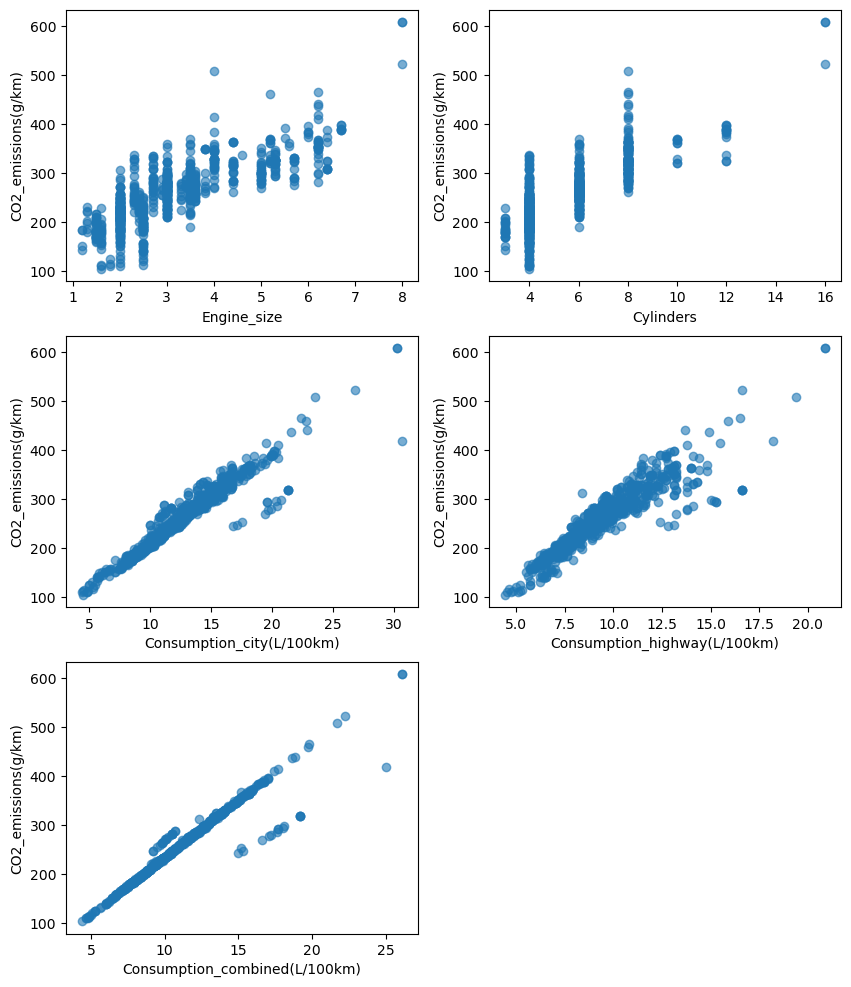

In [23]:
# creación de la figura que contendra los gráficos o subplots
fig = plt.figure(figsize=(10, 12))
# asignación de los subplots a las variables
ax1 = fig.add_subplot(3, 2, 1) # subplot 1 con 3 filas, 2 columnas y el número de subplot en la figura (1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)

# crear los gráficos de dispersión
ax1.scatter(data_1['Engine_size'], data['CO2_emissions(g/km)'], alpha=0.6)
ax1.set_xlabel('Engine_size')
ax1.set_ylabel('CO2_emissions(g/km)')

ax2.scatter(data_1['Cylinders'], data['CO2_emissions(g/km)'], alpha=0.6)
ax2.set_xlabel('Cylinders')
ax2.set_ylabel('CO2_emissions(g/km)')

ax3.scatter(data_1['Consumption_city(L/100km)'], data['CO2_emissions(g/km)'], alpha=0.6)
ax3.set_xlabel('Consumption_city(L/100km)')
ax3.set_ylabel('CO2_emissions(g/km)')

ax4.scatter(data_1['Consumption_highway(L/100km)'], data['CO2_emissions(g/km)'], alpha=0.6)
ax4.set_xlabel('Consumption_highway(L/100km)')
ax4.set_ylabel('CO2_emissions(g/km)')

ax5.scatter(data_1['Consumption_combined(L/100km)'], data['CO2_emissions(g/km)'], alpha=0.6)
ax5.set_xlabel('Consumption_combined(L/100km)')
ax5.set_ylabel('CO2_emissions(g/km)')


plt.show()

Lo siguiente será calcular y mostrar la matriz de correlación, recordemos que mientras más cercano a 1 existe una correlación positiva fuerte.

In [10]:
mat_corr_data_1 = data_1.corr()
mat_corr_data_1

,Engine_size,Cylinders,Consumption_city(L/100km),Consumption_highway(L/100km),Consumption_combined(L/100km),CO2_emissions(g/km)
Engine_size,1.000000,0.916271,0.824653,0.716638,0.802255,0.800182
Cylinders,0.916271,1.000000,0.830425,0.709129,0.803290,0.813920
Consumption_city(L/100km),0.824653,0.830425,1.000000,0.914139,0.989248,0.955332
Consumption_highway(L/100km),0.716638,0.709129,0.914139,1.000000,0.963382,0.926226
Consumption_combined(L/100km),0.802255,0.803290,0.989248,0.963382,1.000000,0.964128
CO2_emissions(g/km),0.800182,0.813920,0.955332,0.926226,0.964128,1.000000


Observado lo anterior, tanto gráficos y valores de correlación nos decantamos por la variable independiente Engine_size o tamaño de motor para nuestro modelo.

In [11]:
# asignamos los datos las variables X e y 
X = data_1['Engine_size'].values.reshape(-1, 1) # se convierte en un array bidimensional usando reshape(-1, 1)
y = data_1['CO2_emissions(g/km)'].values

## Regresión Polinómica

A veces, la tendencia de los datos no es realmente lineal, en estos casos podemos utilizar métodos de regresión polinomial. De hecho, existen muchas regresiones diferentes que pueden usarse para ajustarse a cualquier aspecto del conjunto de datos, como cuadrática, cúbica, etcétera, y pueden continuar hasta infinitos grados.
En esencia, podemos llamar a todo esto regresión polinómica, donde la relación entre la variable independiente **'x'** y la variable dependiente **'y'** se modela como un polinomio de enésimo grado en **'x'**. 

Digamos que deseamos tener una regresión polinómica (un polinomio de 2do grado):

$$ y = \beta + \beta_1x + \beta_2x^2$$

Ahora, la pregunta es: ¿cómo podemos ajustar nuestros datos en la ecuación de la regresión polinómica si solo tenemos valores de tamaño del motor en 'x'? Bueno, se pueden crear algunas características adicionales: 1, $𝑥$ y $𝑥^2$. 

La función **PolynomialFeatures()** en la biblioteca Scikit-learn genera nuevos conjuntos de características a partir del conjunto de características original. Es decir, se generará una matriz que consta de todas las combinaciones polinómicas de las entidades con un grado menor o igual al grado especificado. Por ejemplo, digamos que el conjunto de funciones original tiene solo una característica que para este caso es el tamaño del motor. Ahora, si seleccionamos que el grado del polinomio sea 2, entonces genera 3 características, grado=0, grado=1 y grado=2. Enseguida se observará de manera más clara dicha explicación.

Para continuar con la breve explicación de este modelo, lo primero será importar las bibliotecas necesarias de sklearn, así como dividir los datos en conjunto de entrenamiento (train) y de prueba (test).

In [12]:
# importar las bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#instanciar la función PolynomialFeatures y definir los grados 
poly = PolynomialFeatures(degree=2)
# generar las demás características en X_train
X_train_poly = poly.fit_transform(X_train)

print("Forma de X_train_poly:", X_train_poly.shape)
print(X_train_poly)

Forma de X_train_poly: (672, 3)
[[ 1.    3.    9.  ]
 [ 1.    5.   25.  ]
 [ 1.    5.3  28.09]
 ...
 [ 1.    1.5   2.25]
 [ 1.    3.    9.  ]
 [ 1.    4.4  19.36]]


Podemos observar que se tiene el array con las tres características, la primera con valores de **1**, la segunda con el valor **$x$** y la tercerá con el valor de **$x^2$**, como ejemplo de lo antes descrito, en la segunda fila del array se tienen valores de 1, 5 y 25, es decir, tenemos el valor de x=5 elevado a la potencia 2 o segundo del polinimio, es decir, se agregaron las características faltantes a nuestra variable 'x'.

Como puede ver o deducir, parecen conjuntos de características para un análisis de regresión lineal múltiple, ¿cierto? De hecho, la regresión polinómica es un caso especial de regresión lineal, cuya idea principal es cómo seleccionar sus características. Entonces, simplemente considera reemplazar $𝑥$ por $𝑥_1$, $𝑥^2$ por $𝑥_2$, y así sucesivamente. 

Por tanto, la ecuación de segundo grado o grado 2 se convertiría en:

$$Y = \beta + \beta_1x_1 + \beta_2x_2$$

Ahora ya podemos abordarlo como un problema de "regresión lineal". Por lo tanto, esta regresión polinomial se considera un caso especial de regresión lineal múltiple tradicional. En este sentido, lo siguiente es utilizar el mismo mecanismo de la regresión lineal para resolver este problema, podemos usar la función LinearRegression() para solventarlo:

In [24]:
# importamos el modelo 
from sklearn.linear_model import LinearRegression
# instanciar el modelo 
lr_model = LinearRegression() 
# ajuste del modelo con la variable x con las nuevas características
y_train_ = lr_model.fit(X_train_poly, y_train)
# imprimir los coeficientes
print('Coeficientes:', lr_model.coef_)
print('Intercepto:', lr_model.intercept_)

Coeficientes: [ 0.         53.75376623 -1.90104494]
Intercepto: 110.4945623947246


Con los coeficientes ahora podemos dibujar la línea de ajuste sustituyendo valores en la ecuación:  

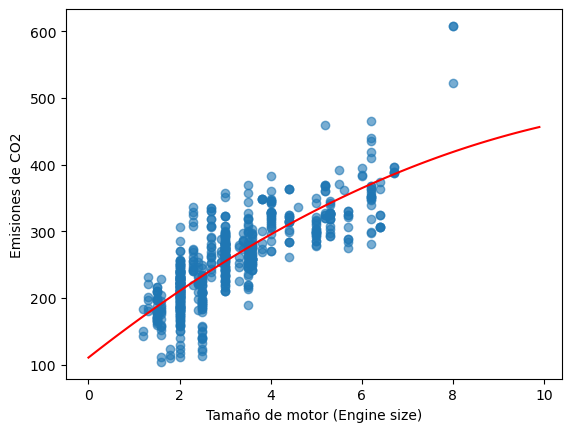

In [14]:
# gráfico de dispersión con los datos de entrenamiento 
plt.scatter(X_train, y_train, alpha=0.6)

# generar un array de 0 a 10, en pasos de 0.1 para ser el valor de x de la línea de ajuste
XX = np.arange(0.0, 10.0, 0.1)

# sustituir los valores de los coeficientes en una ecuación y asignarla los resultados para dibujar la línea de ajuste en el eje y  
yy = lr_model.intercept_ + lr_model.coef_[1]*XX + lr_model.coef_[2]*np.power(XX, 2)

# dibujar la línea con los valores anteriores
plt.plot(XX, yy, '-r')
plt.xlabel('Tamaño de motor (Engine size)')
plt.ylabel('Emisiones de CO2')

plt.show()

Evaluación del modelo con algunas métricas.

In [15]:
# importar 
from sklearn.metrics import r2_score, median_absolute_error, mean_squared_error

X_test_poly = poly.transform(X_test)
y_pred = lr_model.predict(X_test_poly)

mae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R2-score:', round(r2, 2))

Mean Absolute Error: 21.19
Mean Squared Error: 1503.48
R2-score: 0.57


Ahora probemos con un polinomio de grado 3 para realizar una comparativa. 

In [16]:
# crear el objeto con grado 3 
poly_3 = PolynomialFeatures(degree=3)

# genererar las demás caracteristicas en el array
X_train_poly3 = poly_3.fit_transform(X_train)

#instanciar el objeto del modelo de regresión lineal 
lr_model_g3 = LinearRegression()
#ajustar el modelo con los datos de entrenamiento, 
y_train3_ = lr_model_g3.fit(X_train_poly3, y_train)

# imprimir los coeficientes
print('Coeficientes:', lr_model_g3.coef_) 
print('Intercepto:', lr_model_g3.intercept_)

Coeficientes: [  0.         174.13996868 -34.68785412   2.68013887]
Intercepto: -20.244590015816186


Con el modelo ajustado y los coeficientes se gráfica la linea de ajuste dentro del diagrama de dispersión.

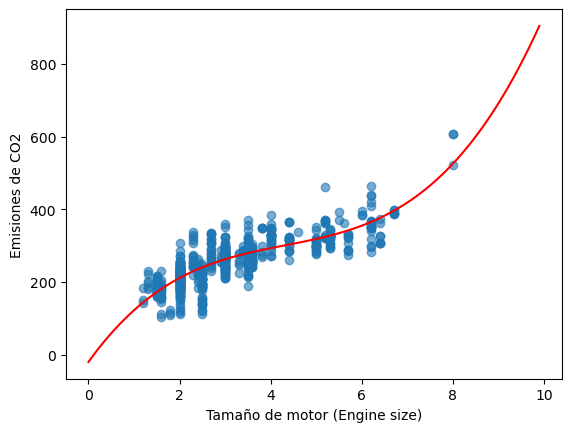

In [18]:
# diagrama de dispersión con los datos de entrenamiento 
plt.scatter(X_train, y_train, alpha=0.6)
# generar un array de 0 a 10, en pasos de 0.1 para ser el valor de x de la línea de ajuste
XX = np.arange(0.0, 10.0, 0.1)
# sustituir los valores de los coeficientes en una ecuación y asignarla los resultados para dibujar la línea de ajuste en el eje y  
yy = lr_model_g3.intercept_ + lr_model_g3.coef_[1]*XX + lr_model_g3.coef_[2]*np.power(XX, 2) + lr_model_g3.coef_[3]*np.power(XX, 3)

# dibujar la línea con los valores anteriores
plt.plot(XX, yy, '-r')
plt.xlabel('Tamaño de motor (Engine size)')
plt.ylabel('Emisiones de CO2')

plt.show()

A primera vista se observa un mejor ajuste que con un grado 2, veamos las métricas para verificar.

In [19]:
# transformar los datos para que tenga igual número de características
X_test_poly3 = poly_3.transform(X_test)
# realizar los valores predichos
y_pred_g3 = lr_model_g3.predict(X_test_poly3)
# obtenemos las étricas y se asignan a las variables
mae_g3 = median_absolute_error(y_test, y_pred_g3)
mse_g3 = mean_squared_error(y_test, y_pred_g3)
r2_g3 = r2_score(y_test, y_pred_g3)

print('Mean Absolute Error:', round(mae_g3, 2))
print('Mean Squared Error:', round(mse_g3, 2))
print('R2-score:', round(r2_g3, 2))

Mean Absolute Error: 19.2
Mean Squared Error: 1483.97
R2-score: 0.58


Como se observa, existen mejoras en los valores de las métricas, sin embargo, no parecen muy significativos, para realizar un mejor modelo podrían trabajarse mejor los datos, tal vez realizar una limpieza de datos atípicos, imputar valores extremos, etcétera, pero esto ya dependerá tipo de problema o el objetivo del negocio, así como de la experiencia y toma de decisiones del analista o científico de datos, está parte supera el ejemplo práctico que tiene por objetivo el presente trabajo.

----------------------------------------------------------------------------------------------------

Liga para obtener código y datos:  https://github.com/LandinGabriel13/Modelo_de_regresion_plinomica

Elaborado por: **Gabriel Armando Landín Alvarado**